In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

data = pd.read_csv("creditcard.csv")
X = data.drop(columns=['Time', 'Class']).values
Y = data['Class'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y)
x_train = x_train[y_train == 0]

minVal = np.min(x_train)
maxVal = np.max(x_train)

x_train = (x_train - minVal) / (maxVal - minVal + 1e-8)
x_test = (x_test - minVal) / (maxVal - minVal + 1e-8)

x_train.shape


(213224, 29)

In [4]:
model = Sequential([
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(29, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='mse'
)
result = model.fit(x_train, x_train, epochs=20, validation_split=.1)

Epoch 1/20
5997/5997 ━━━━━━━━━━━━━━━━━━━━ 3s 451us/step - loss: 0.0204 - val_loss: 5.9241e-06
Epoch 2/20
5997/5997 ━━━━━━━━━━━━━━━━━━━━ 3s 419us/step - loss: 5.0443e-06 - val_loss: 5.0041e-06
Epoch 3/20
5997/5997 ━━━━━━━━━━━━━━━━━━━━ 3s 418us/step - loss: 4.9097e-06 - val_loss: 2.8070e-07
Epoch 4/20
5997/5997 ━━━━━━━━━━━━━━━━━━━━ 3s 430us/step - loss: 1.8111e-07 - val_loss: 6.5339e-08
Epoch 5/20
5997/5997 ━━━━━━━━━━━━━━━━━━━━ 3s 422us/step - loss: 6.4005e-08 - val_loss: 2.7375e-08
Epoch 6/20
5997/5997 ━━━━━━━━━━━━━━━━━━━━ 3s 419us/step - loss: 5.8598e-08 - val_loss: 3.3717e-08
Epoch 7/20
5997/5997 ━━━━━━━━━━━━━━━━━━━━ 3s 415us/step - loss: 4.5033e-08 - val_loss: 2.8167e-08
Epoch 8/20
5997/5997 ━━━━━━━━━━━━━━━━━━━━ 3s 416us/step - loss: 3.7373e-08 - val_loss: 1.8320e-08
Epoch 9/20
5997/5997 ━━━━━━━━━━━━━━━━━━━━ 3s 416us/step - loss: 2.5296e-08 - val_loss: 1.8384e-08
Epoch 10/20
5997/5997 ━━━━━━━━━━━━━━━━━━━━ 3s 423us/step - loss: 3.3594e-08 - val_loss: 2.1576e-08
Epoch 11/20
5997/5997 ━

In [15]:
test_recon = model.predict(x_test)
mse = np.mean(np.square(x_test - test_recon), axis=1)
mse

2226/2226 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step


array([1.37621613e-09, 4.60432086e-09, 2.38692033e-09, ...,
       3.74384030e-08, 2.41376194e-09, 6.83675708e-09])

In [16]:
train_recon = model.predict(x_train)
train_mse = np.mean(np.square(x_train - train_recon))
threshold = train_mse.mean() + 3 * train_mse.std()

y_pred = (mse > threshold)
y_pred


6664/6664 ━━━━━━━━━━━━━━━━━━━━ 1s 204us/step


array([False, False, False, ...,  True, False, False])

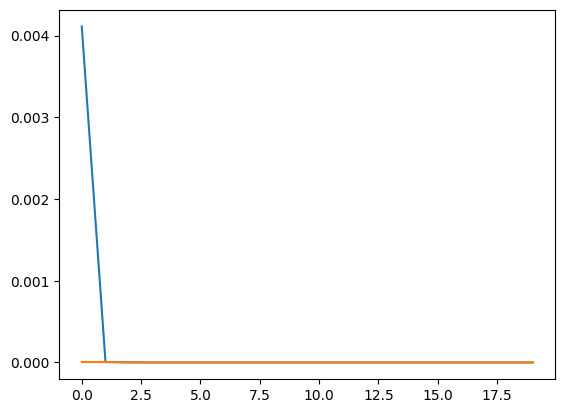

In [17]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.show()

In [18]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     71091
           1       0.01      0.93      0.02       111

    accuracy                           0.87     71202
   macro avg       0.51      0.90      0.48     71202
weighted avg       1.00      0.87      0.93     71202

[[62059  9032]
 [    8   103]]
